#### Imports

Imports

In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Data.data

To display figures inline in Jupyter notebook:

In [3]:
%matplotlib inline

Load data

In [4]:
folder = '../Output'
df = []

files = sorted(os.listdir(folder))
print(files)
for file in files:
    csv_filename = os.path.join(folder, file)
    csv_file = pd.read_csv(csv_filename)
    df.append(csv_file)

print(len(df))

['gizem_test_data.csv']
1


In [5]:
df[0]

,global_time,elapsed_time,human_pitch,human_roll,human_yaw,mark
0,1.588711e+09,0.012794,0.000000,0.000000,0.000000,not-aided
1,1.588711e+09,0.042560,0.000000,0.000000,0.000000,not-aided
2,1.588711e+09,0.072738,0.000000,0.000000,0.000000,not-aided
3,1.588711e+09,0.102665,0.000000,0.000000,0.000000,not-aided
4,1.588711e+09,0.132577,0.000000,0.000000,0.000000,not-aided
...,...,...,...,...,...,...
1008,1.588711e+09,30.252556,0.150462,0.033794,0.081863,not-aided
1009,1.588711e+09,30.282550,0.150518,0.034420,0.081361,not-aided
1010,1.588711e+09,30.312548,0.150911,0.034798,0.080604,not-aided
1011,1.588711e+09,30.342699,0.151350,0.034171,0.080724,not-aided


Plot for time and motion

### MATPLOTLIB

#### Function way

In [ ]:
plt.subplot(1,3,1)
plt.plot(df[0]['elapsed_time'], df[0]['y_deg'])
plt.xlabel('Time')
plt.ylabel('Yaw (degrees)')
plt.title('YAW')
plt.subplot(1,3,2)
plt.plot(df[0]['elapsed_time'], df[0]['p_deg'])
plt.xlabel('Time')
plt.ylabel('Pitch (degrees)')
plt.title('PITCH')
plt.subplot(1,3,3)
plt.plot(df[0]['elapsed_time'], df[0]['r_deg'])
plt.xlabel('Time')
plt.ylabel('Roll (degrees)')
plt.title('ROLL')

#### Object Oriented way

fig = plt.figure()
axes = fig.add_axes([0, 10, 1, 1])
axes.plot(df[1]['elapsed_time'], df[0]['p_deg'])
axes.set_xlabel('Time')
axes.set_ylabel('Pitch (degrees)')
axes.set_title('PITCH')


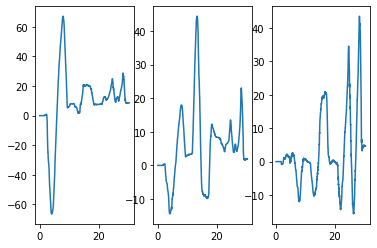

In [8]:
fig,axes = plt.subplots(nrows = 1, ncols = 3)
# plt.tight_layout()
axes[0].plot(df[0]['elapsed_time'], np.degrees(df[0]['human_pitch']))
axes[1].plot(df[0]['elapsed_time'], np.degrees(df[0]['human_roll']))
axes[2].plot(df[0]['elapsed_time'], np.degrees(df[0]['human_yaw']))

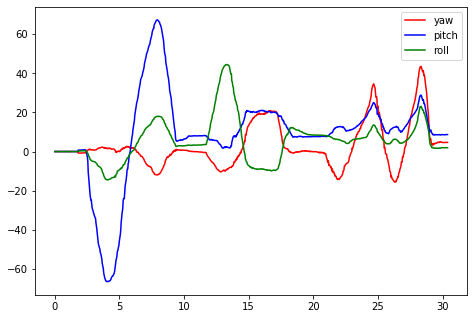

In [9]:
fig = plt.figure()
axis = fig.add_axes([0, 10, 1, 1])
axis.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_yaw']),'r', label='yaw')
axis.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_pitch']),'b', label='pitch')
axis.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_roll']),'g', label='roll')

axis.legend()